## Importing Modules

In [22]:
import math
import io
import pandas as pd  
import numpy as np  
import matplotlib
import matplotlib.pyplot as pp  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.api import OLS
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
import scipy.stats
import scipy.optimize
import scipy.spatial
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import numpy as np
from yellowbrick.regressor import AlphaSelection

## Loading in Dataset 

In [23]:
#reads in csv file, data extracted using scraper.py
df = pd.read_csv('ff_data21.csv', header=None)
df.columns = ['name','team','position','gp','pre_ranking','points','owners', 'actual_ranking', 'passyds','passtd', 'passint', 'rushyds', 'rushtd', 'recepts', 'recyds', 'rectd', 'returntd', '2pt', 'fumble']
df=df.dropna()

In [24]:
pos_dummies = pd.get_dummies(df.position, prefix='pos')
df = pd.concat([df, pos_dummies], axis=1)

In [25]:
df

,name,team,position,gp,pre_ranking,points,owners,actual_ranking,passyds,passtd,...,rectd,returntd,2pt,fumble,pos_QB,pos_RB,pos_TE,pos_WR,"pos_WR,RB","pos_WR,TE"
0,Josh Allen,Buf,QB,17,56,402.58,100%,1,4407,36,...,0,0,3,3,1,0,0,0,0,0
1,Justin Herbert,LAC,QB,17,68,380.76,99%,2,5014,38,...,0,0,6,1,1,0,0,0,0,0
2,Tom Brady,TB,QB,17,60,374.74,99%,3,5316,43,...,0,0,0,3,1,0,0,0,0,0
3,Patrick Mahomes,KC,QB,17,25,361.66,100%,4,4839,37,...,0,0,2,4,1,0,0,0,0,0
4,Cooper Kupp,LAR,WR,17,11,367.00,100%,5,0,0,...,16,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Robert Tonyan,GB,TE,8,126,41.40,18%,363,0,0,...,2,0,0,0,0,0,1,0,0,0
296,Cam Sims,Was,WR,14,2071,41.30,0%,364,0,0,...,2,0,0,0,0,0,0,1,0,0
297,John Bates,Was,TE,17,1878,40.90,1%,365,0,0,...,1,0,0,0,0,0,1,0,0,0
298,Mike Glennon,NYG,QB,6,2621,30.90,1%,366,790,4,...,0,0,0,3,1,0,0,0,0,0


In [26]:
#prints description for our data set
df.describe()

,gp,pre_ranking,points,actual_ranking,passyds,passtd,passint,rushyds,rushtd,recepts,...,rectd,returntd,2pt,fumble,pos_QB,pos_RB,pos_TE,pos_WR,"pos_WR,RB","pos_WR,TE"
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,14.050000,459.006667,125.427467,185.106667,424.770000,2.703333,1.376667,191.343333,1.566667,35.443333,...,2.523333,0.016667,0.380000,0.730000,0.153333,0.270000,0.163333,0.403333,0.006667,0.003333
std,3.279739,710.435351,77.534814,111.759066,1150.513524,7.877532,3.679663,302.177735,2.787734,27.351792,...,2.811132,0.128233,0.768702,1.152473,0.360911,0.444701,0.370287,0.491386,0.081513,0.057735
min,4.000000,1.000000,30.900000,1.000000,0.000000,0.000000,0.000000,-13.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,75.750000,64.225000,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,156.500000,106.200000,190.500000,0.000000,0.000000,0.000000,32.000000,0.000000,32.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,324.750000,170.475000,283.250000,0.000000,0.000000,0.000000,271.500000,2.000000,49.000000,...,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,17.000000,2623.000000,402.580000,367.000000,5316.000000,43.000000,17.000000,1811.000000,18.000000,145.000000,...,16.000000,1.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,points,Value
0,mean,125.427467
1,median,106.200000


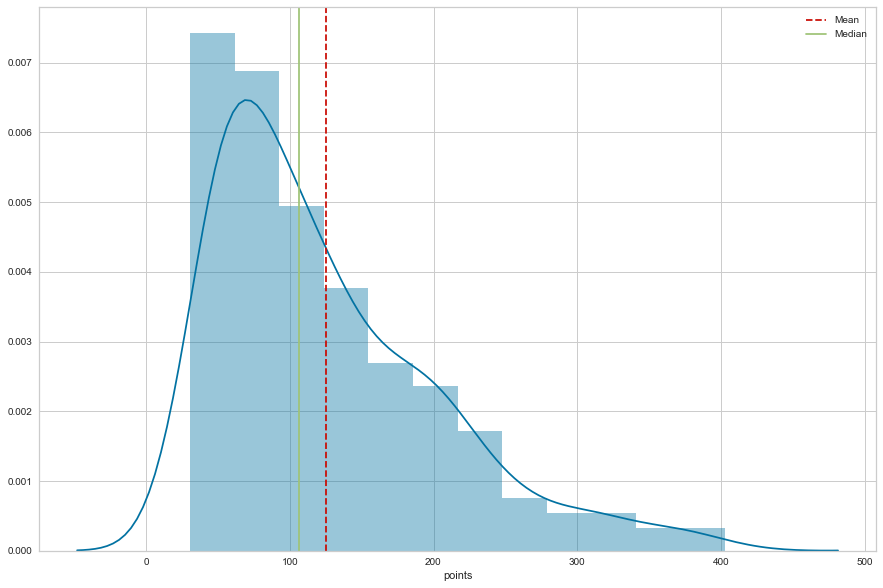

In [27]:
#describes values chosen 
vals = df.describe().drop(['points'],axis=1).columns 
#predictors
X = df[vals].values

#target variable
y = df['points'].values

#Plot creation
pp.figure(figsize=(15,10))
pp.tight_layout()

seabornInstance.distplot(df['points'])
mean=df['points'].mean()
median=df['points'].median()

pp.axvline(mean, color='r', linestyle='--')
pp.axvline(median, color='g', linestyle='-')


pp.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'points': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

In [28]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#summary Statistics Prior to Lasso
print(OLS(y_train,X_train).fit().summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.273
Model:                            OLS   Adj. R-squared (uncentered):              0.218
Method:                 Least Squares   F-statistic:                              4.955
Date:                Thu, 07 Apr 2022   Prob (F-statistic):                    6.71e-10
Time:                        00:20:37   Log-Likelihood:                         -1691.5
No. Observations:                 270   AIC:                                      3421.
Df Residuals:                     251   BIC:                                      3489.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

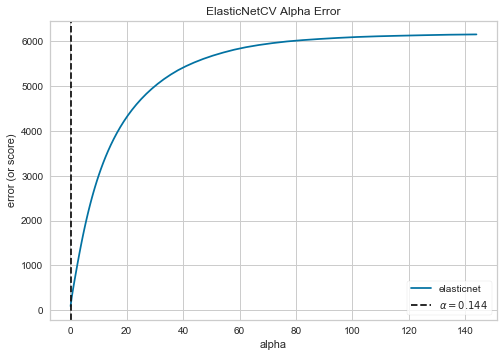

In [29]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=3, copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

In [30]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=0.144, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


coefs = pd.DataFrame({ 'Variables': vals, 'Coefficients': clf.coef_})
display(coefs)


print("Intercept: " + str(clf.intercept_))





ElasticNet Predict with transformations:


,Variables,Coefficients
0,gp,2.269916
1,pre_ranking,-0.918164
2,actual_ranking,-17.405979
3,passyds,20.692882
4,passtd,31.355824
5,passint,1.640106
6,rushyds,16.937395
7,rushtd,15.176396
8,recepts,12.181528
9,recyds,19.022774


Intercept: 127.23155555555554


In [31]:
coefs.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Variables,gp,pre_ranking,actual_ranking,passyds,passtd,passint,rushyds,rushtd,recepts,recyds,rectd,returntd,2pt,fumble,pos_QB,pos_RB,pos_TE,pos_WR,"pos_WR,RB","pos_WR,TE"
Coefficients,2.26992,-0.918164,-17.406,20.6929,31.3558,1.64011,16.9374,15.1764,12.1815,19.0228,14.1699,0.335356,2.37674,-0.651986,0.444243,-0.221098,-0.702121,0.237806,0.136373,-0.00826629


In [32]:
y_test

array([ 70.3 ,  81.7 , 308.8 ,  64.9 ,  57.1 , 110.7 ,  62.1 ,  70.6 ,
       201.1 , 133.5 ,  42.3 , 282.8 ,  84.2 ,  54.  , 263.7 , 167.02,
        48.3 , 149.4 ,  62.6 ,  94.5 ,  79.6 , 137.1 , 121.7 , 116.7 ,
        64.9 , 126.2 ,  75.5 ,  43.4 ,  59.6 ,  41.4 ])

In [33]:
y_pred

array([ 73.57125327,  84.99446688, 294.98522876,  62.64572403,
        51.94173737, 113.55557942,  60.27729731,  70.41197478,
       209.39623788, 141.36512542,  39.37915284, 259.00470931,
        90.34291168,  52.9745835 , 244.45595808, 173.61994368,
        49.81671161, 150.27835202,  62.21479658,  97.88268783,
        84.42147411, 135.85191019, 132.62257053, 121.01828836,
        63.08561625, 131.59720697,  82.3845294 ,  39.98552605,
        58.78570016,  32.87739747])

In [34]:
#Displays Residuals in Tabular Format
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfElastic.head()
#with pd.option_context("display.max_rows", 100):
    #display(dfElastic)

,Actual,Predicted
0,70.3,73.571253
1,81.7,84.994467
2,308.8,294.985229
3,64.9,62.645724
4,57.1,51.941737


Elastic Graph


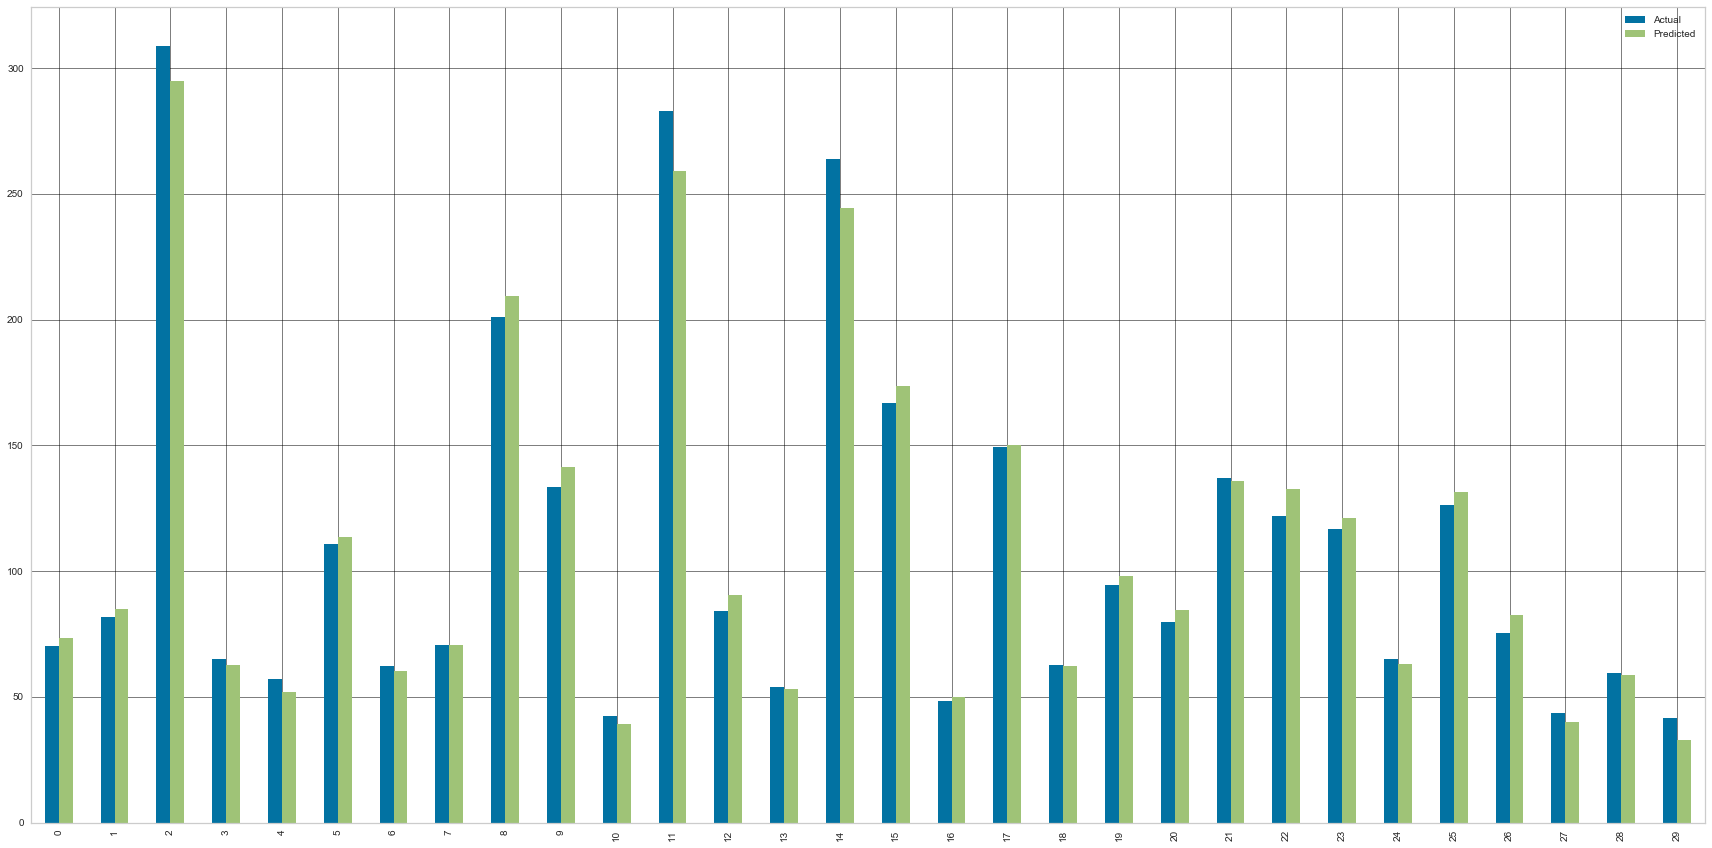

In [35]:
#Displays Residuals in Graphical Format
print("Elastic Graph")
dfElastic.plot(kind='bar',figsize=(30,15))
pp.grid(which='major', linestyle='-', linewidth='0.5', color='black')
pp.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pp.show()

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 5.429000877912344
Mean Squared Error: 58.530350694334714
Root Mean Squared Error: 7.650513100069479


In [37]:
import numpy as np
import statistics
from statistics import mean
from statistics import stdev
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
bootstrap_iter = 10000    # designate the number of iterations for bootstrapping

accuracy = []
coefs = []
clf = linear_model.ElasticNet(alpha=.142, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
intercept =[]
for i in range(bootstrap_iter):
    X_, y_ = resample(X_train, y_train)
    clf.fit(X_, y_)
    y_pred = clf.predict(X_test)
    acc = metrics.mean_squared_error(y_test, y_pred)
    accuracy.append(acc)
    coefs.append(clf.coef_)
    intercept.append(clf.intercept_)

average = []
for i in range(len(clf.coef_)):
    avg =0
    for j in range(len(coefs)):
        avg += coefs[j][i]
    average.append(avg)

avg_ints = sum(intercept)/len(intercept)

for x in range(len(average)):
    average[x] = average[x]/len(average)
    
 

avgPD = pd.DataFrame({'Variables': vals, 'Average Coefficients': clf.coef_})
avgintPD = pd.DataFrame({'Average Intercept': ['avg_int'], 'Value': [avg_ints]})

display(avgPD)
display(avgintPD)

print('Mean Squared Error:', mean(accuracy))



,Variables,Average Coefficients
0,gp,1.881260
1,pre_ranking,-1.417192
2,actual_ranking,-20.165234
3,passyds,20.631351
4,passtd,31.086047
5,passint,0.523503
6,rushyds,14.579701
7,rushtd,14.968001
8,recepts,11.679288
9,recyds,19.350351


,Average Intercept,Value
0,avg_int,127.106643


Mean Squared Error: 69.50127179929451


In [38]:
#get predictions

In [39]:
X = scaler.transform(X)
y = clf.predict(X)

In [40]:
df['predicted_points'] = y

In [41]:
df

,name,team,position,gp,pre_ranking,points,owners,actual_ranking,passyds,passtd,...,returntd,2pt,fumble,pos_QB,pos_RB,pos_TE,pos_WR,"pos_WR,RB","pos_WR,TE",predicted_points
0,Josh Allen,Buf,QB,17,56,402.58,100%,1,4407,36,...,0,3,3,1,0,0,0,0,0,365.208112
1,Justin Herbert,LAC,QB,17,68,380.76,99%,2,5014,38,...,0,6,1,1,0,0,0,0,0,349.225655
2,Tom Brady,TB,QB,17,60,374.74,99%,3,5316,43,...,0,0,3,1,0,0,0,0,0,348.365738
3,Patrick Mahomes,KC,QB,17,25,361.66,100%,4,4839,37,...,0,2,4,1,0,0,0,0,0,332.718440
4,Cooper Kupp,LAR,WR,17,11,367.00,100%,5,0,0,...,0,1,0,0,0,0,1,0,0,316.081712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Robert Tonyan,GB,TE,8,126,41.40,18%,363,0,0,...,0,0,0,0,0,1,0,0,0,32.736305
296,Cam Sims,Was,WR,14,2071,41.30,0%,364,0,0,...,0,0,0,0,0,0,1,0,0,33.510538
297,John Bates,Was,TE,17,1878,40.90,1%,365,0,0,...,0,0,0,0,0,1,0,0,0,33.034114
298,Mike Glennon,NYG,QB,6,2621,30.90,1%,366,790,4,...,0,0,3,1,0,0,0,0,0,38.095308


In [ ]:
df.to_csv("")